## Tarea 1 del curso CM-072

                            
### Nelson Steven Sanabio Maldonado
### 20152734A

## Lista de preguntas:

1 . Responde de acuerdo a los conceptos hechos en clase las siguientes preguntas:
   * Supongamos que tenemos la tarea de construir un sistema que pueda distinguir  correo no deseado o spam. ¿Qué crees que hay en un correo electrónico no deseado que nos permite saber que es spam? ¿Cómo puede la computadora detectar spam a través de un análisis sintáctico?. ¿Qué te gustaría que hiciera la computadora si detecta un correo electrónico que es spam?, ¿eliminarlo automáticamente, moverlo a un archivo diferente o simplemente resaltarlo en la pantalla?.
   
   * ¿Cómo se puede predecir el siguiente comando a ser escrito por un usuario? ¿O la próxima página de la que descargará información en la Web? ¿Cuándo sería útil tal predicción? ¿Cuándo no?.

* 
  - Publicidad, Mensajes de páginas donde uno se suscribe o se logea, correos no identificados. 
  - Enseñandole a la computadora los msm que nos importa(aprendizaje supervisado) para que establezca relaciones de dependencias, categoría gramatical, etc.
  - Eliminarlo automaticamente conociendo los patrones de la eliminación usando algoritmos de aprendizaje supervisado (input - output).  

2 . ¿Puedes predecir las especies de un iris usando medidas de pétalos y sépalos?

   * Lee los datos del conjunto predeterminado `iris` en un DataFrame de Pandas, incluyendo los nombres de las columnas.
   * Recolecta  información básica sobre los datos `iris`  utilizando pandas.
   * Utiliza la clasificación, [dividir-aplicar-combinar](https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html) y  visualización para buscar las diferencias entre las especies.

   * Escribe un conjunto de reglas que podrían usarse para predecir especies en base a las mediciones de iris.
   * Define una función que acepte una fila de datos y devuelva una especie pronosticada. Luego, usa esa función para hacer predicciones para todas las filas de datos existentes y verifique la precisión de sus predicciones.


In [6]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
print(iris['DESCR'])
# Obteniendo la data de iris a la variable X
X = iris.data
# Convirtiendo en DataFrame con sus respectivos nombres gracias a iris['DESCR']
data_frame = pd.DataFrame(X,columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])
# Haciendo uso de las etiquetas
Y = iris.target_names
list(Y)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

['setosa', 'versicolor', 'virginica']

In [7]:
# Viendo la relación de tamaños entre el sepal y petal
group = data_frame.groupby(["Sepal Length","Petal Length"]).sum()
print(group)

                           Sepal Width  Petal Width
Sepal Length Petal Length                          
4.3          1.1                   3.0          0.1
4.4          1.3                   6.2          0.4
             1.4                   2.9          0.2
4.5          1.3                   2.3          0.3
4.6          1.0                   3.6          0.2
             1.4                   6.6          0.5
             1.5                   3.1          0.2
4.7          1.3                   3.2          0.2
             1.6                   3.2          0.2
4.8          1.4                   6.0          0.4
             1.6                   6.5          0.4
             1.9                   3.4          0.2
4.9          1.4                   3.0          0.2
             1.5                   9.3          0.3
             3.3                   2.4          1.0
             4.5                   2.5          1.7
5.0          1.2                   3.2          0.2
            

In [8]:
# Describiendo algunas reglas para predecir especies
# Reglas:
# 1) Analizar los datos con sus caracteristicas y ver que modelo usar.
# 2) Recopilar datos en dos partes (Conjunto de entrenamiento (75%) y conjunto de prueba (25%)).
# 3) Escoger un algoritmo de clasificación - K vecinos más cercano.
# 4) Almacenar el conjunto de entrenamiento.
# 5) LLamar a la función KNeighborsClassifier
# 6) Usar el estimador para el seguimiento de los datos con el método fit
# 7) Ready for run code !!!

In [9]:
from sklearn.model_selection import train_test_split
import random as rnd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Creando una función en la cual genera aleatoriamente una fila del datos para ver mas adelante la predicción
# np.random.rand(4) = Array de 4 elementos
def GenerarDatos():
    lista=[]
    for i in range(10):
        lista.insert(i,4.5*np.random.rand(4))
    return lista

# Creando una modelo de clasificación - aprendizaje supervisado
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(iris['data'], iris['target'])
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_entrenamiento, y_entrenamiento)
X_nuevo=GenerarDatos()

# Predicción de los datos generados
prediccion = knn.predict(X_nuevo)
print("Objetivo predicho : {}".format(iris['target_names'][prediccion]))
print("Hallando la precisión : {:.2f}".format(knn.score(X_prueba,y_prueba)))

Objetivo predicho : ['versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica']
Hallando la precisión : 0.97


3 . Sea el siguiente código de generación de datos:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

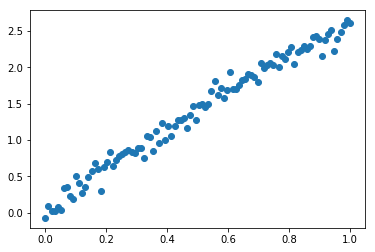

In [11]:
# Recolectamos datos artificiales
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

Usando los siguientes datos y scikit learn, desarrolla los siguientes pasos descritos en clase, para una regresión lineal:

* Escoger un modelo
* Elegir modelo de hiperparámetros
* Organiza los datos en una matriz de características y vector objetivo.
* Fija el modelo a tus datos.
* Predecir etiquetas para datos desconocidos.

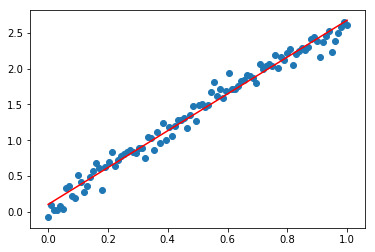

In [12]:
import numpy as np
from sklearn import linear_model
# Modelo hiperparámetrico
modelo = linear_model.LinearRegression(fit_intercept=True,normalize=False)

# Matrix de características
features_mat = x[:,np.newaxis]
# Vector objetivo
objective_vec = y 
modelo.fit(features_mat, objective_vec) 

#Fijando los datos al modelo
xfit = np.linspace(0,1,100)
xfit=xfit[:,np.newaxis]

# Prediccion de la recta 
yfit = modelo.predict(xfit) 

plt.scatter(x, y) 
plt.plot(x, yfit, '-r')


4 . Realiza los mismos pasos para el conjunto  de datos de scikit learn  [load_diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [16]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn import linear_model
data_diabetes = load_diabetes()
import numpy as np

In [17]:
data_diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

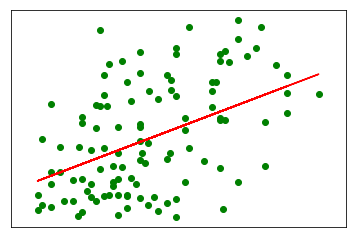

In [18]:
X = data_diabetes.data[:, np.newaxis, 3]

# Dividiendo los datos de X en dos partes como lo mencionamos en la pregunta 2
# Los datos repartidos para entrenar son 331 el total es 442 y para la prueba el lo restante es 111
X_entrenamiento=X[:-111]
X_prueba = X[-111:]

data_diabetes["target"].shape

Y_entrenamiento=data_diabetes["target"][:-111]
Y_prueba=data_diabetes["target"][-111:]

# Usando el modelo de regresión lineal
modelo = linear_model.LinearRegression()

modelo.fit(X_entrenamiento,Y_entrenamiento)

Y_diabetes_pred=modelo.predict(X_prueba)

plt.scatter(X_prueba, Y_prueba,  color='green')
plt.plot(X_prueba, Y_diabetes_pred, color='red')

plt.xticks(())
plt.yticks(())

plt.show()
# Interpretando, se dice los datos que están sobre la recta tiene mas probabilidad de sufrir diabetes.

5 (Obligatoria). Lee el siguiente artículo [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html), responde las siguientes preguntas:

* En el ejemplo Party Registration, ¿cuáles son las características? ¿Cuál es la respuesta? ¿Es  un problema de regresión o clasificación?.

* Conceptualmente, ¿cómo se aplica KNN a este problema para hacer una predicción?
* ¿Cómo se relacionan las cuatro visualizaciones en la sección 3 entre sí?. Cambia el valor de **k** utilizando el control deslizante y explica por que  cambió  las visualizaciones.
* En las figuras 4 y 5, ¿qué significan los colores más claros en comparación con los colores más oscuros? ¿Cómo se calcula la oscuridad?

* ¿Qué representa la línea negra en la figura 5? ¿Qué predicciones haría el mejor modelo de aprendizaje automático con respecto a esta línea?

* Elije un valor pequeño para `k` y haz clic en el botón `Generate New Training Data` varias veces. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?

* Repite este procedimiento con un valor muy grande de `k`. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?.

* Utiliza otros valores de `k`. ¿Qué valor crees que es "mejor"? ¿Cómo defines "mejor"?.

* ¿Un pequeño valor de `k` produce "overfitting" o "underfitting"? y ¿por qué?.

* ¿Por qué debería importarnos la varianza? ¿No deberíamos minimizar el sesgo e ignorar la varianza?.

#### Respuestas:

- Las carácteristicas son la riqueza y la religiosidad, estas propiedades son cuantitativas, además se puede observar de la gráfica de que hay más personas republicanas que son religiosas, por otro lado observamos que en riqueza están probablemente equitativos. La respuesta es que las personas republicanas pueda que gane como no tampoco, va influir mucho el entorno en la cual se encuentren los votantes, si se encuentran dentro del entorno donde hay mas votantes republicanos pueden hacer que la persona democráta cambie de partido debio a su entorno, ahora veremos los errores, sobre el sesgo, al no darle seguimiento a los votantes pueda que varie en cada respuesta que obtengamos y en la varianza, se nota que hay una buena cantidad de datos que están agrupados, cada grupo independientemente tendrá una variabilidad. Se puede concluir de que se trata de un problema de clasificación de multiclase.

- Lo que hace el modelo de KNN es una clasificación de datos que estima qué tan probable es que un punto de datos del conjunto de datos sea miembro de un grupo u otro según el grupo en el que se encuentren los puntos de datos más cercanos y eso se puede observar en la interfaz del ejemplo, cambiando el K, donde se juntan los vecinos cercano a dicho punto de dato.

- La primera imagen viene hacer la representación del conjunto de datos, sin usar ningún modelo. El segundo es ya usando el modelo KNN donde se observa que están dividido independientemente en poligonos irregulares, se podría decir que el K que se usa para esa imágen es 1. El tercero es usando una interfaz interactiva donde nos permite predecir el voto de un votante, que esta cerca a cualquiera de los votantes(Republicanos y Demócratas) al momento de seleccionar un punto del conjunto de datospara un cierto K para esta imagen el K = 2. La cuarta es variando el K, con un boton deslizante en la cual predice para cualquier K, que solicitemos. Nos muestra con diferentes intensidades de un mismo color, la probabilidad que cambie de registro.

- Como mencione en la anterior pregunta, cuando es de color puro se dice que es preciso osea que su voto es fijo, en caso contrario se dice que probablemente pueda cambiar de votación. Se puede hacer variar la intensidad de color mediante cuantos vecinos están cerca a su alrededor de un punto y contarlo, luego sacar un porcentaje, ponerlo en el argumento de la intensidad, sintaxis del color (R,G,B,I), donde I viene hacer la intensidad en porcentaje y los colores (R,G,B) son fijos para un grupo.

- La línea negra viene hacer la predicción para que los individuos se clasifiquen como demócratas o republicanos. 


- Para un K =5, el sesgo es bajo ya que la mayoria de puntos se encuentra en la parte inferior al igual que el otro caso, y la varianza es alta ya que hay mas puntos que no son precisos (votantes) y que pueden que cambien.

- Para un K = 70, sucede como en el caso anterior pero en este caso hay mas imprecisiones ya que al escoger nuevos datos se observa que uno de los votantes(Republicanos o Demócratas) no son precisos, es decir, de que la varianza es alta en cambio el sesgo se mantiene uniforme ya que se respeta la frontera de la línea negra.

- Para K = 3, el resultado es mejor, ya que se pueden notar de que cada votante esta seguro de su votación(se puede notas en los colores que son puros-rojo o azul), es decir, que nadie ni nada podrá hacerle cambiar de votación, esto significa literalmente "mejor", ya que como podemos ver en el gráfico, se tiene un sesgo bajo con una varianza baja entonces es confiable usar el modelo KNN para un K=3 para una mejor eficiencia en las predicciones.

- Cuando K = 1, se dice que es underfitting ya que no adecua bien los datos, es decir, no puede modelar los datos de entrenamiento ni generalizar a nuevos datos, también se dice que es ineficiente para K = 1, podría ser una solución cambiar de modelo.


- Nos debe importar la varianza ya que calcula que tan próximo esta un punto al objetivo, para casos repetitivos del modelo, no basta con minimizar el sesgo, como en el ejemplo que nos dio la lectura, necesitabamos mas datos y ver sus caracteristica para una mejor predicción - varianza - además hay tener mucho cuidado al disminuir el sesgo con la varianza para poder obtener prediciones eficientes, no siempre obtendremos esos resultados ya que en algunos casos, cuando modificas algún cambio en el sesgo o en la varianza puedes alterar la varianza o el sesgo respectativamente. 